# Entregável 2

## Análise e Limpeza de dados

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('dataset2.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [67]:
df.head()

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890


## Dados categóricos

In [115]:
df['sex'].unique()

array(['M', 'F', 'male', 'female'], dtype=object)

In [116]:
df["sex"].replace("male", "M", inplace=True)
df["sex"].replace("female", "F", inplace=True)

In [68]:
df.describe()

,age,height,weight
count,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,88.910496
std,16.425919,0.099272,33.328269
min,14.000000,1.376462,17.970189
25%,28.000000,1.636008,69.394196
50%,42.000000,1.702588,83.518259
75%,57.000000,1.776343,99.050654
max,70.000000,2.054139,335.295817


## Gráfico do peso em função da altura: Scatterplot

<AxesSubplot:xlabel='height', ylabel='weight'>

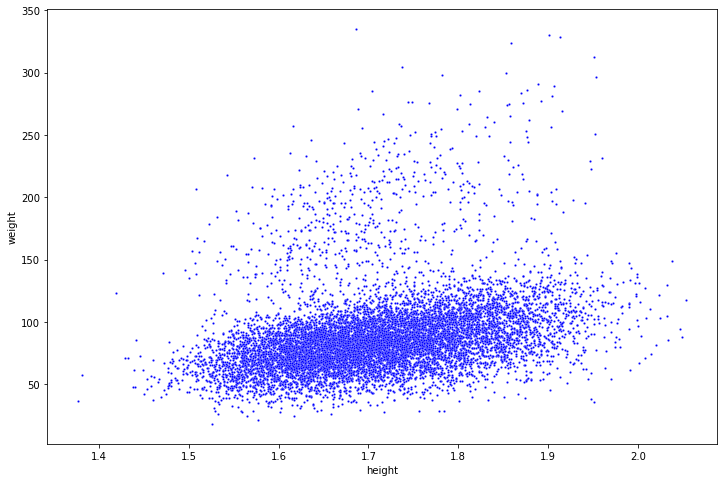

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x='height', y= 'weight', s=5, color="blue" )

Podemos observar que há overplotting numa faixa de peso, revelando uma tendência nos valores. Podemos desconsiderar os outliers!


## Análise de features

Vamos analisar cada uma das features acima para observarmos as inconsistências

### Peso

<AxesSubplot:ylabel='Density'>

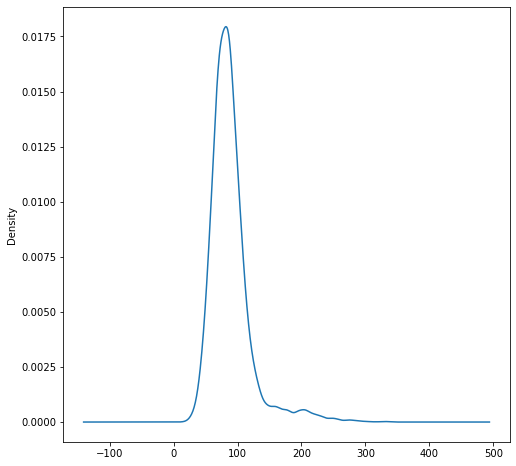

In [7]:
plt.figure(figsize=(8,8))
df['weight'].plot(kind='kde')

A feature de peso apresenta uma inconsistência numa faixa de valores logo após o 100.

<AxesSubplot:ylabel='Frequency'>

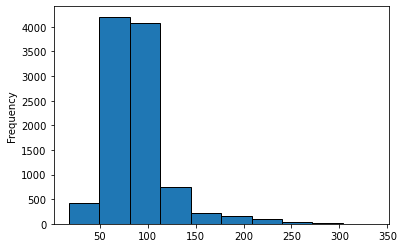

In [8]:
df['weight'].plot(kind='hist', edgecolor='black')

### Altura

<AxesSubplot:ylabel='Density'>

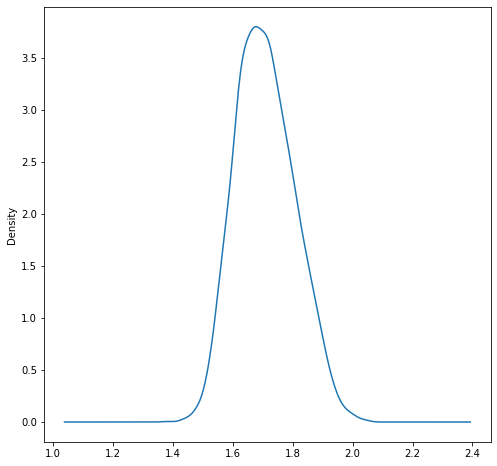

In [9]:
plt.figure(figsize=(8,8))
df['height'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

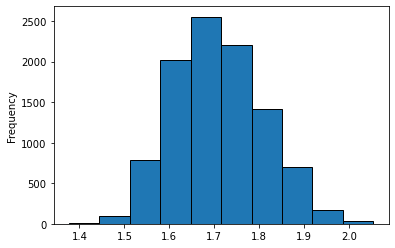

In [10]:
df['height'].plot(kind='hist', edgecolor='black')

Podemos observar que ambas as features seguem uma distribuição normal, com a feature peso apresentando um desvio padrão muito baixo, causando o overplotting.

Uma forma de resolvermos o problema de overplotting, é reduzir o tamanho da amostra, selecionando um espectro menor de valores e eliminando os outliers.

In [86]:
df = df[(df['weight']) < 150]

<AxesSubplot:xlabel='height', ylabel='weight'>

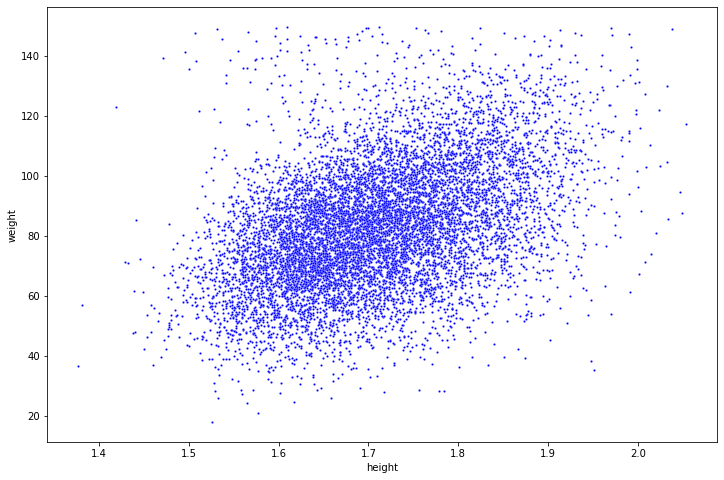

In [87]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x='height', y= 'weight', s=5, color="blue" )

Podemos observar que há uma correlação de valores

## Cálculo do IMC(índice de massa corporal)

IMC = Peso / Altura²

In [91]:
df['IMC'] = ((df['weight']) /  (df['height'])**2)

In [92]:
df.head()

,sex,age,height,weight,IMC
0,M,62,1.874021,114.384199,32.569938
1,F,44,1.672676,76.031332,27.174950
2,F,49,1.587970,46.403086,18.401889
3,F,25,1.653451,104.352744,38.169932
4,M,65,1.744867,76.831890,25.235778


## Outliers:

Os outliers são valores que se distanciam bastante da nossa análise, influenciando e prejudicando a predição de modelos.

Eles poder ser classificados em dois tipos: Univariados e multivariados.

Univariados: Aparecem analisando uma variável(feature).

Multivariados: São notados por distribuições multidimensionais.

In [97]:
df['IMC'].describe()

count    9500.000000
mean       28.425289
std         6.519266
min         7.715833
25%        24.143068
50%        28.247949
75%        32.435677
max        65.022895
Name: IMC, dtype: float64

Podemos observar que o valor máx se afasta bastante do valor médio e da distribuição(Univariado).

<AxesSubplot:ylabel='Frequency'>

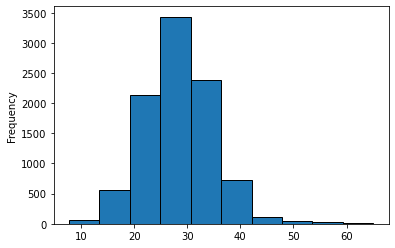

In [99]:
df['IMC'].plot(kind='hist', edgecolor='black')

In [100]:
df = df[(df['IMC']) < 50]

No gráfico de dispensão, podemos remover os outliers multivariados

In [105]:
df = df[(df['height']) > 1.45]
df = df[(df['height']) < 2]
df = df[(df['weight']) < 140]

<AxesSubplot:xlabel='height', ylabel='weight'>

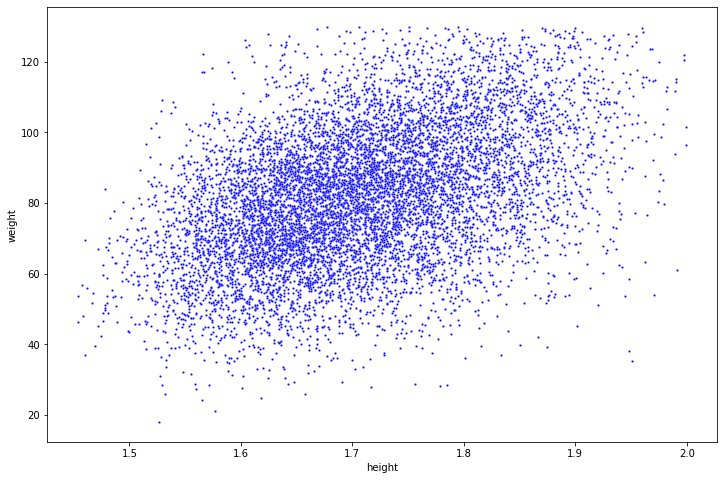

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x='height', y= 'weight', s=5, color="blue" )

## Classificação IMC

In [112]:
def classificar_imc(imc):
    if imc < 18.5:
        return "Magreza"
    elif 18.5 <= imc < 24.9:
        return "Saudável"
    elif 25 <= imc < 29.9:
        return "Sobrepeso"
    elif 30 <= imc < 34.9:
        return "Obesidade"
    elif 35 <= imc < 39.9:
        return "Obesidade Severa"
    else:
        return "Obesidade Mórbida"

In [113]:
df['Classificação'] = df['IMC'].apply(classificar_imc)

In [111]:
df.head()

,sex,age,height,weight,IMC,Classificação
0,M,62,1.874021,114.384199,32.569938,Obesidade
1,F,44,1.672676,76.031332,27.174950,Sobrepeso
2,F,49,1.587970,46.403086,18.401889,Magreza
3,F,25,1.653451,104.352744,38.169932,Obesidade Severa
4,M,65,1.744867,76.831890,25.235778,Sobrepeso


## Altura e Peso em função do Sexo: Violinplot

<AxesSubplot:xlabel='sex', ylabel='height'>

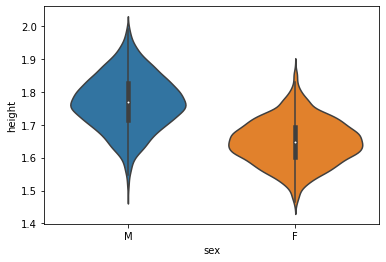

In [118]:
sns.violinplot(data=df, x="sex", y="height")

<AxesSubplot:xlabel='sex', ylabel='weight'>

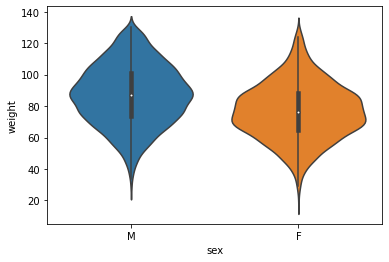

In [119]:
sns.violinplot(data=df, x="sex", y="weight")